Created by : Hyunho Park

Created at : 01/10/2023

Updated at : 01/14/2023

## 1.0. Turorial Objective

ref. https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Multiclass%20Classification%20Tutorial%20Level%20Beginner%20-%20MCLF101.ipynb

Will check about the below:
- Getting data: How to import data from Pycaret repository
- Setting up Enviroment : How to setup an experiment in PyCaret and get started with building multiclass models
- Create Model : How to create a model, perform stratified cross validation and evaluate classification metries.
- Tune Model: How to automatically tune the hyper-parameters of a multiclass model
- Finalize Model : How to finalize the best model at the end of the experiment
- Predict Model : How to make predictions on new / unseen data
- Save / Load Model : How to save / load a model for future use

## 1.1 Installing PyCaret

In [5]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 

## 1.2. For Google colab apply

When use the notebook on google colab, run the following code at top of notebook to desplay the interactive visuals

In [6]:
from pycaret.utils import enable_colab

enable_colab()

Colab mode enabled.


## 2.0 What is Multiclass Classification?

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification). Multiclass classification should not be confused with multi-label classification, where multiple labels are to be predicted for each instance.

## 3.0 Overview of the Classification Module in PyCaret

PyCaret's classification module (pycaret.classification) is a supervised machine learning module which is used for classifying the elements into binary or multinomial groups based on various techniques and algorithms.

The PyCaret classification module can be used for Binary or Multi-class classification problems. It has **over 18 algorithms and 14 plots to analyze the performance of models**. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

## 4.0. Dataset 

For this tutorial we will use the Iris Dataset from UCI. This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. Short descriptions of each column are as follows:

- sepal_length: Length of Sepal
- sepal_width: Width of Sepal
- petal_length: Length of Petal
- petal_width: Width of Petal
- species: One of three class (Setosa, Versicolour, Virginica) Target Column

# 5.0 Getting the Data

In [49]:
'''
Import library
'''

import numpy as np

np.__version__

'1.21.6'

In [7]:
from pycaret.datasets import get_data

df = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
'''
Split dataset into train and test data
'''

train_df = df.groupby('species').apply(lambda x : x.sample(frac= 0.9, random_state = 777))
test_df = df.drop(train_df.index.get_level_values(1))

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(inplace = True)

print(f'Devide dataset into train and test dataset.')

Devide dataset into train and test dataset.


In [46]:
train_df.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,45,45,45,45
Iris-versicolor,45,45,45,45
Iris-virginica,45,45,45,45


In [47]:
test_df.groupby('species').count()

,index,sepal_length,sepal_width,petal_length,petal_width
species,,,,,
Iris-setosa,5,5,5,5,5
Iris-versicolor,5,5,5,5,5
Iris-virginica,5,5,5,5,5


# 6.0 Setting up the Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. **setup() must be called before executing any other function in pycaret.** It takes **two mandatory parameters**: **a pandas dataframe** and **the name of the target column**. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using the numeric_features and categorical_features parameters in setup().

In [51]:
from pycaret.classification import *

In [52]:
%%time

setup_data = setup(data = train_df, target = 'species', session_id=777) 

,Description,Value
0,session_id,777
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virgi..."
4,Original Data,"(135, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

CPU times: user 1.03 s, sys: 67.5 ms, total: 1.1 s
Wall time: 22.4 s


# 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [54]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9789,1.0000,0.9778,0.9842,0.9783,0.9682,0.9711,0.015
lda,Linear Discriminant Analysis,0.9578,1.0000,0.9556,0.9678,0.9564,0.9361,0.9420,0.014
knn,K Neighbors Classifier,0.9378,0.9768,0.9389,0.9558,0.9344,0.9053,0.9161,0.022
nb,Naive Bayes,0.9378,0.9940,0.9361,0.9558,0.9341,0.9051,0.9159,0.013
et,Extra Trees Classifier,0.9278,0.9934,0.9278,0.9483,0.9241,0.8902,0.9022,0.235
lr,Logistic Regression,0.9267,1.0000,0.9250,0.9475,0.9227,0.8884,0.9008,0.449
rf,Random Forest Classifier,0.9178,0.9862,0.9111,0.9350,0.9139,0.8741,0.8848,0.197
lightgbm,Light Gradient Boosting Machine,0.9178,0.9767,0.9167,0.9358,0.9141,0.8748,0.8856,0.218
ada,Ada Boost Classifier,0.9056,0.9808,0.8972,0.9258,0.9010,0.8557,0.8683,0.089
gbc,Gradient Boosting Classifier,0.9056,0.9731,0.9056,0.9317,0.9013,0.8569,0.8721,0.191


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


# 8.0 Create a Model

## 8.1. QDA

In [55]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,1.0,0.8889,0.9250,0.8971,0.8485,0.8616
1,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,1.0,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


## 8.1. LDA

In [56]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,1.0,0.8889,0.9250,0.8971,0.8485,0.8616
1,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,1.0,0.8889,0.9200,0.8956,0.8462,0.8598
3,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,1.0,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,1.0,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


## 8.2. KNN

In [57]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9000,1.0000,0.9167,0.9333,0.9029,0.8485,0.8616
2,0.8000,0.9167,0.7778,0.8667,0.7700,0.6875,0.7370
3,0.9000,0.9536,0.9167,0.9250,0.9000,0.8507,0.8636
4,0.8889,0.8981,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


# 9.0 Tune a Model

When a model is created using the create_model() function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the tune_model() function is used. This function automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. To use the custom search grid, you can pass custom_grid parameter in the tune_model function

## 9.1. QDA

In [59]:
# tune_model(model_name)

tuned_qda = tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9000,1.0000,0.9167,0.9333,0.9029,0.8485,0.8616
2,0.8000,0.9690,0.7778,0.8667,0.7700,0.6875,0.7370
3,0.9000,1.0000,0.8889,0.9200,0.8956,0.8462,0.8598
4,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
5,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
6,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.38,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


## 9.2. LDA

In [61]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,1.0,0.8889,0.9250,0.8971,0.8485,0.8616
1,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,1.0,0.8889,0.9200,0.8956,0.8462,0.8598
3,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,1.0,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,1.0,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.001,
                           solver='eigen', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


## 9.2. KNN

In [65]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,10,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9000,1.0000,0.9167,0.9333,0.9029,0.8485,0.8616
2,0.9000,1.0000,0.8889,0.9200,0.8956,0.8462,0.8598
3,0.9000,0.9845,0.8889,0.9200,0.8956,0.8462,0.8598
4,0.8889,0.9444,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using the optimize parameter. For example: tune_model(dt, optimize = 'Recall') will search for the hyperparameters of a Decision Tree Classifier that result in the highest Recall. For the purposes of this example, we have used the default metric Accuracy for the sake of simplicity only. The methodology behind selecting the right metric to evaluate a classifier is beyond the scope of this tutorial but if you would like to learn more about it, you can click here to read an article on how to choose the right evaluation metric.

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of kfolds etc. As you progress through the tutorial series we will discuss those factors in detail at the intermediate and expert levels. For now, let's move forward considering the Tuned K Neighbors Classifier as our best model for the remainder of this tutorial.

# 10.0 Plot a Model

Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are 15 different plots available, please see the plot_model() docstring for the list of available plots.

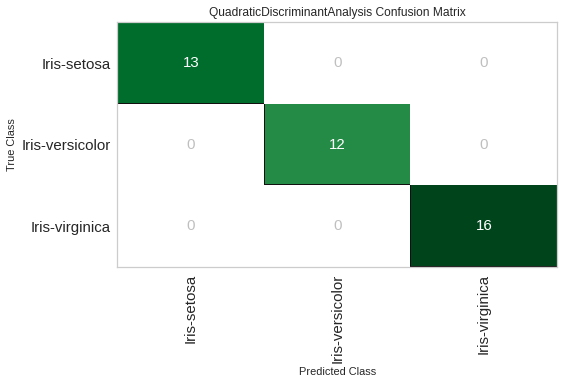

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [69]:
plot_model(tuned_qda, plot = 'confusion_matrix')

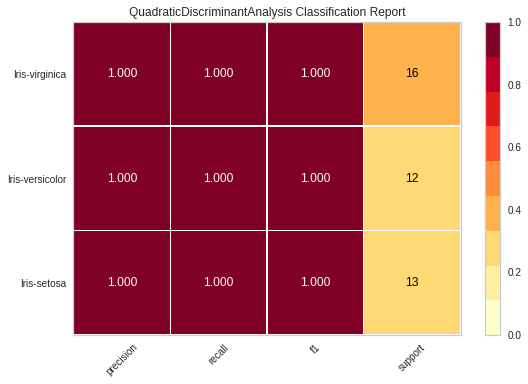

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [70]:
plot_model(tuned_qda, plot = 'class_report')

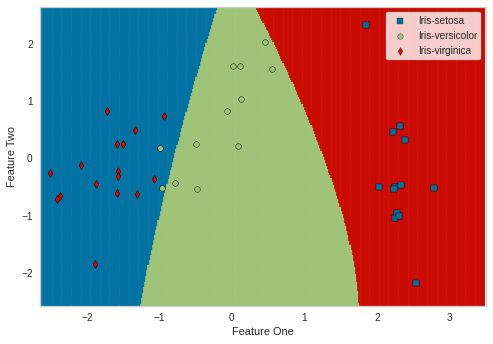

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [71]:
plot_model(tuned_qda, plot='boundary')

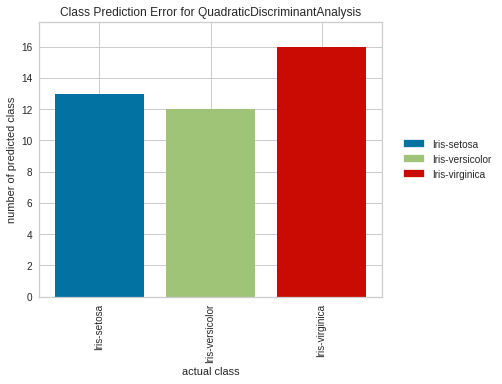

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [72]:
plot_model(tuned_qda, plot = 'error')

# 11.0 Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid, you will see that 30% (41 samples) of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the tuned_knn variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [76]:
predict_model(tuned_qda);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.38,
                              store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 12.0 Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [77]:
final_qda = finalize_model(tuned_qda)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.38,
                              store_covariance=False, tol=0.0001), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing QuadraticDiscriminantAnalysis(priors=None, reg_param=0.38,
                              store_covariance=False, tol=0.0001)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.38,
                              store_covariance=False, tol=0.0001), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:lo

# 13.0 Predict on unseen data
The predict_model() function is also used to predict on the unseen dataset. The only difference is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning of the tutorial and contains 10% (15 samples) of the original dataset which was never exposed to PyCaret.

In [80]:
predictions = predict_model(final_qda, data=test_df)

predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.38,
                              store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.0,1.0,0,0,0,0,0


,index,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa,0.9999
1,23,5.1,3.3,1.7,0.5,Iris-setosa,Iris-setosa,0.9996
2,38,4.4,3.0,1.3,0.2,Iris-setosa,Iris-setosa,1.0000
3,39,5.1,3.4,1.5,0.2,Iris-setosa,Iris-setosa,0.9999
4,47,4.6,3.2,1.4,0.2,Iris-setosa,Iris-setosa,1.0000


# 14.0 Saving the model

We have now finished the experiment by finalizing the tuned_knn model which is now stored in the final_knn variable. We have also used the model stored in final_knn to predict data_unseen. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

In [89]:
save_model(final_qda, 'model_qda')
print(f'DONE')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.38,
                              store_covariance=False, tol=0.0001), model_name=model_qda, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'pass

Transformation Pipeline and Model Successfully Saved
DONE


# 15.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's load_model() function and then easily apply the saved model on new unseen data for prediction.

In [90]:
saved_final_qda = load_model('model_qda')


INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=model_qda, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [91]:
new_prediction = predict_model(saved_final_qda, data=test_df)


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='species')),
                ('fix_perfect', Remove_100(target='species')),
                ('clean_names', Clean_Colum_Names

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.0,1.0,0,0,0,0,0
